In [230]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [231]:
df = pd.read_csv("df_trian_test_all.csv")

print("Shape:", df.shape)
df

Shape: (117303, 69)


/var/folders/rj/522y7b7n1dl67qg86lzg9y_00000gn/T/ipykernel_31910/1068827036.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("df_trian_test_all.csv")


,dataset_id,frame,time_sec,hand,hand_detected,x_0,x_1,x_2,x_3,x_4,...,z_12,z_13,z_14,z_15,z_16,z_17,z_18,z_19,z_20,behavior
0,1,4838,80.633,Left,1,0.562638,0.523307,0.482645,0.453211,0.428097,...,0.023250,0.028924,0.040879,0.040476,0.037134,0.040757,0.047972,0.050100,0.050478,other
1,1,4839,80.650,Left,1,0.568650,0.525218,0.484482,0.452202,0.425792,...,0.017942,0.029138,0.037961,0.035304,0.031126,0.042559,0.047509,0.047854,0.047420,other
2,1,4840,80.667,Left,1,0.608788,0.557545,0.508360,0.473195,0.442089,...,0.088957,0.051530,0.078208,0.091393,0.097686,0.066829,0.087819,0.099258,0.106655,other
3,1,4841,80.683,Left,1,0.649046,0.593075,0.538306,0.499576,0.468654,...,0.063482,0.053335,0.076139,0.072194,0.064933,0.070201,0.086469,0.086850,0.084640,other
4,1,4842,80.700,Left,1,0.650377,0.594110,0.538319,0.499342,0.467740,...,0.073443,0.059745,0.085387,0.082217,0.074459,0.077140,0.094935,0.095359,0.092450,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117298,02-test-02,9344,155.733,Right,1,0.609859,0.628273,0.638872,0.643476,0.639209,...,-0.058292,-0.023093,-0.035895,-0.040860,-0.043179,-0.015898,-0.025459,-0.028888,-0.030629,place
117299,02-test-02,9363,156.050,Left,1,0.602536,0.589899,0.577123,0.566656,0.556542,...,0.031850,0.025728,0.035991,0.036300,0.034742,0.029306,0.037760,0.040049,0.040621,place
117300,02-test-02,9364,156.067,Left,1,0.597199,0.586713,0.575515,0.565771,0.556603,...,0.036705,0.027454,0.038350,0.041242,0.041872,0.031525,0.041576,0.046160,0.048631,place
117301,02-test-02,9385,156.417,Left,1,0.631980,0.606961,0.579943,0.557783,0.540972,...,0.016828,0.013896,0.019525,0.020413,0.020078,0.016429,0.021066,0.024460,0.026366,other


In [232]:
df['behavior'].value_counts()

behavior
rotate    37333
hold      29140
adjust    21171
press     12677
other     11047
place      3443
lift       2239
Name: count, dtype: int64

In [233]:
df  = df[df['behavior'].notna()]

In [204]:
behavior_map = {
    'press': 0,
    'adjust': 1,
    'rotate': 2,
    'other': 3,
    'hold': 3,
    'lift': 3,
    'place': 3
}

df['behavior_encoded'] = df['behavior'].map(behavior_map)
df

/var/folders/rj/522y7b7n1dl67qg86lzg9y_00000gn/T/ipykernel_31910/3204879524.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['behavior_encoded'] = df['behavior'].map(behavior_map)


,dataset_id,frame,time_sec,hand,hand_detected,x_0,x_1,x_2,x_3,x_4,...,z_13,z_14,z_15,z_16,z_17,z_18,z_19,z_20,behavior,behavior_encoded
0,1,4838,80.633,Left,1,0.562638,0.523307,0.482645,0.453211,0.428097,...,0.028924,0.040879,0.040476,0.037134,0.040757,0.047972,0.050100,0.050478,other,3
1,1,4839,80.650,Left,1,0.568650,0.525218,0.484482,0.452202,0.425792,...,0.029138,0.037961,0.035304,0.031126,0.042559,0.047509,0.047854,0.047420,other,3
2,1,4840,80.667,Left,1,0.608788,0.557545,0.508360,0.473195,0.442089,...,0.051530,0.078208,0.091393,0.097686,0.066829,0.087819,0.099258,0.106655,other,3
3,1,4841,80.683,Left,1,0.649046,0.593075,0.538306,0.499576,0.468654,...,0.053335,0.076139,0.072194,0.064933,0.070201,0.086469,0.086850,0.084640,other,3
4,1,4842,80.700,Left,1,0.650377,0.594110,0.538319,0.499342,0.467740,...,0.059745,0.085387,0.082217,0.074459,0.077140,0.094935,0.095359,0.092450,other,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117298,02-test-02,9344,155.733,Right,1,0.609859,0.628273,0.638872,0.643476,0.639209,...,-0.023093,-0.035895,-0.040860,-0.043179,-0.015898,-0.025459,-0.028888,-0.030629,place,3
117299,02-test-02,9363,156.050,Left,1,0.602536,0.589899,0.577123,0.566656,0.556542,...,0.025728,0.035991,0.036300,0.034742,0.029306,0.037760,0.040049,0.040621,place,3
117300,02-test-02,9364,156.067,Left,1,0.597199,0.586713,0.575515,0.565771,0.556603,...,0.027454,0.038350,0.041242,0.041872,0.031525,0.041576,0.046160,0.048631,place,3
117301,02-test-02,9385,156.417,Left,1,0.631980,0.606961,0.579943,0.557783,0.540972,...,0.013896,0.019525,0.020413,0.020078,0.016429,0.021066,0.024460,0.026366,other,3


In [234]:
for col in df:
    print(col)

dataset_id
frame
time_sec
hand
hand_detected
x_0
x_1
x_2
x_3
x_4
x_5
x_6
x_7
x_8
x_9
x_10
x_11
x_12
x_13
x_14
x_15
x_16
x_17
x_18
x_19
x_20
y_0
y_1
y_2
y_3
y_4
y_5
y_6
y_7
y_8
y_9
y_10
y_11
y_12
y_13
y_14
y_15
y_16
y_17
y_18
y_19
y_20
z_0
z_1
z_2
z_3
z_4
z_5
z_6
z_7
z_8
z_9
z_10
z_11
z_12
z_13
z_14
z_15
z_16
z_17
z_18
z_19
z_20
behavior


In [236]:
for cols in df:
    print(cols)

dataset_id
frame
time_sec
hand
hand_detected
x_0
x_1
x_2
x_3
x_4
x_5
x_6
x_7
x_8
x_9
x_10
x_11
x_12
x_13
x_14
x_15
x_16
x_17
x_18
x_19
x_20
y_0
y_1
y_2
y_3
y_4
y_5
y_6
y_7
y_8
y_9
y_10
y_11
y_12
y_13
y_14
y_15
y_16
y_17
y_18
y_19
y_20
z_0
z_1
z_2
z_3
z_4
z_5
z_6
z_7
z_8
z_9
z_10
z_11
z_12
z_13
z_14
z_15
z_16
z_17
z_18
z_19
z_20
behavior


In [237]:
# === Define Angle Calculation (Normalized Vector) === #
def calculate_angle(df, a, b, c, feature_name):
    a_xyz = df[[f'x_{a}', f'y_{a}', f'z_{a}']].values
    b_xyz = df[[f'x_{b}', f'y_{b}', f'z_{b}']].values
    c_xyz = df[[f'x_{c}', f'y_{c}', f'z_{c}']].values

    ab = a_xyz - b_xyz
    cb = c_xyz - b_xyz

    ab_norm = ab / (np.linalg.norm(ab, axis=1, keepdims=True) + 1e-8)
    cb_norm = cb / (np.linalg.norm(cb, axis=1, keepdims=True) + 1e-8)

    cosine_angle = np.sum(ab_norm * cb_norm, axis=1)
    angle_rad = np.arccos(np.clip(cosine_angle, -1.0, 1.0))
    angle_deg = np.degrees(angle_rad)

    df[feature_name] = angle_deg
    return df

def calculate_angle_features(df):
    df = calculate_angle(df, 0, 5, 17, 'angle_hand_open')
    df = calculate_angle(df, 0, 9, 13, 'angle_palm_curve')
    df = calculate_angle(df, 5, 6, 7, 'angle_index_flex')
    df = calculate_angle(df, 9, 10, 11, 'angle_middle_flex')
    df = calculate_angle(df, 13, 14, 15, 'angle_ring_flex')
    df = calculate_angle(df, 17, 18, 19, 'angle_pinky_flex')
    df = calculate_angle(df, 1, 2, 3, 'angle_thumb_flex')
    df = calculate_angle(df, 4, 0, 8, 'angle_thumb_index')
    df = calculate_angle(df, 4, 0, 20, 'angle_thumb_pinky')
    
    df = calculate_angle(df, 8, 7, 6, 'angle_index_tip_flex')  
    df = calculate_angle(df, 4, 3, 2, 'angle_thumb_tip_flex') 

    return df

def add_pairwise_distance(df, point_a, point_b, name):
    dx = df[f'x_{point_a}'] - df[f'x_{point_b}']
    dy = df[f'y_{point_a}'] - df[f'y_{point_b}']
    dz = df[f'z_{point_a}'] - df[f'z_{point_b}']
    df[f'dist_{name}'] = np.sqrt(dx**2 + dy**2 + dz**2)
    return df

def add_rolling_stats(df, col, window=5):
    df[f'{col}_mean{window}'] = df[col].shift(1).rolling(window=window, min_periods=1).mean()
    df[f'{col}_std{window}'] = df[col].shift(1).rolling(window=window, min_periods=1).std().fillna(0)
    return df

# === MAIN LOOP: Apply per dataset_id === #
feature_list = []

for dataset_id, df_clip in df.groupby('dataset_id'):
    df_clip = df_clip.copy()
    df_clip = df_clip.sort_values('frame').reset_index(drop=True) #improve
    
    # Velocity
    for axis in ['x', 'y', 'z']:
        for i in range(21):
            col = f'{axis}_{i}'
            df_clip[f'vel_{col}'] = df_clip[col].diff().fillna(0)

    # Acceleration
    for axis in ['x', 'y', 'z']:
        for i in range(21):
            vcol = f'vel_{axis}_{i}'
            df_clip[f'acc_{axis}_{i}'] = df_clip[vcol].diff().fillna(0)

    # Jerk
    for axis in ['x', 'y', 'z']:
        for i in range(21):
            acol = f'acc_{axis}_{i}'
            df_clip[f'jerk_{axis}_{i}'] = df_clip[acol].diff().fillna(0)

    # Angle + Delta Angle
    df_clip = calculate_angle_features(df_clip)
    angle_cols = [
        'angle_hand_open', 'angle_palm_curve', 'angle_index_flex', 'angle_middle_flex',
        'angle_ring_flex', 'angle_pinky_flex', 'angle_thumb_flex',
        'angle_thumb_index', 'angle_thumb_pinky', 'angle_index_tip_flex', 'angle_thumb_tip_flex'
    ]
    for col in angle_cols:
        df_clip[f'delta_{col}'] = df_clip[col].diff().fillna(0)

    # Pairwise distances
    df_clip = add_pairwise_distance(df_clip, 4, 8, 'thumb_index')
    df_clip = add_pairwise_distance(df_clip, 4, 20, 'thumb_pinky')
    df_clip = add_pairwise_distance(df_clip, 5, 17, 'index_pinky')
    df_clip = add_pairwise_distance(df_clip, 5, 9, 'index_middle')
    df_clip = add_pairwise_distance(df_clip, 1, 13, 'thumb_ring')
    
    # extra for 'press' 
    df_clip = add_pairwise_distance(df_clip, 8, 4, 'index_thumb')
    
    df_clip = add_pairwise_distance(df_clip, 8, 0, 'index_wrist')
   
    df_clip = add_pairwise_distance(df_clip, 4, 0, 'thumb_wrist')



    # Rolling mean/std (jerk + angle)
    for axis in ['x', 'y', 'z']:
        col = f'jerk_{axis}_0'
        if col in df_clip.columns:
            df_clip = add_rolling_stats(df_clip, col, window=5)

    for col in angle_cols:
        if col in df_clip.columns:
            df_clip = add_rolling_stats(df_clip, col, window=5)
            
    if 'vel_z_8' in df_clip.columns:
        df_clip = add_rolling_stats(df_clip, 'vel_z_8', window=5)

    if 'acc_z_8' in df_clip.columns:
        df_clip = add_rolling_stats(df_clip, 'acc_z_8', window=5)

    if 'z_8' in df_clip.columns:
        df_clip = add_rolling_stats(df_clip, 'z_8', window=5)

    if 'jerk_z_8' in df_clip.columns and 'jerk_z_8_mean5' in df_clip.columns:
        df_clip['delta_jerk_z_8_mean5'] = df_clip['jerk_z_8'] - df_clip['jerk_z_8_mean5']

    feature_list.append(df_clip)

df_with_features = pd.concat(feature_list, ignore_index=True)

/var/folders/rj/522y7b7n1dl67qg86lzg9y_00000gn/T/ipykernel_31910/2424026707.py:66: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_clip[f'acc_{axis}_{i}'] = df_clip[vcol].diff().fillna(0)
/var/folders/rj/522y7b7n1dl67qg86lzg9y_00000gn/T/ipykernel_31910/2424026707.py:66: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_clip[f'acc_{axis}_{i}'] = df_clip[vcol].diff().fillna(0)
/var/folders/rj/522y7b7n1dl67qg86lzg9y_00000gn/T/ipykernel_31910/2424026707.py:66: PerformanceWarning: DataFrame is highly fragmented.  This is usually the 

In [238]:
df_with_features

,dataset_id,frame,time_sec,hand,hand_detected,x_0,x_1,x_2,x_3,x_4,...,angle_index_tip_flex_mean5,angle_index_tip_flex_std5,angle_thumb_tip_flex_mean5,angle_thumb_tip_flex_std5,vel_z_8_mean5,vel_z_8_std5,acc_z_8_mean5,acc_z_8_std5,z_8_mean5,z_8_std5
0,1,4838,80.633,Left,1,0.562638,0.523307,0.482645,0.453211,0.428097,...,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000
1,1,4839,80.650,Left,1,0.568650,0.525218,0.484482,0.452202,0.425792,...,151.194965,0.000000,172.957403,0.000000,0.000000,0.000000,0.000000,0.000000,0.005625,0.000000
2,1,4840,80.667,Left,1,0.608788,0.557545,0.508360,0.473195,0.442089,...,154.687438,4.939102,169.031677,5.551815,-0.003404,0.004814,-0.003404,0.004814,0.002221,0.004814
3,1,4841,80.683,Left,1,0.649046,0.593075,0.538306,0.499576,0.468654,...,155.212920,3.609122,168.204774,4.178832,0.018771,0.038559,0.021041,0.042476,0.022127,0.034646
4,1,4842,80.700,Left,1,0.650377,0.594110,0.538319,0.499342,0.467740,...,157.937108,6.194243,168.840738,3.641368,0.014298,0.032730,0.000219,0.054194,0.032299,0.034844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117045,9,11162,186.033,Left,1,0.718923,0.734442,0.744641,0.737008,0.725827,...,146.142305,8.213483,169.755917,2.779044,0.006903,0.014801,0.003483,0.024549,0.026771,0.018338
117046,9,11163,186.050,Left,1,0.721087,0.718295,0.722373,0.717360,0.707138,...,146.041143,8.220635,168.581054,2.256331,0.009871,0.014668,0.002968,0.024407,0.036641,0.021633
117047,9,11164,186.067,Left,1,0.727917,0.702366,0.698836,0.695893,0.689087,...,146.654260,7.955145,167.138111,2.220829,0.012679,0.010921,0.002809,0.024514,0.049321,0.014290
117048,9,11165,186.083,Left,1,0.725409,0.714362,0.713132,0.704889,0.694947,...,144.416865,8.528317,167.127918,2.209870,0.006244,0.006114,-0.006435,0.012949,0.055565,0.012401


In [241]:
nan_behavior_rows = df_with_features[
    (df_with_features['dataset_id'] == 2) &
    (df_with_features['behavior'].isna())
]

print(nan_behavior_rows[['frame', 'time_sec', 'dataset_id', 'behavior']])

Empty DataFrame
Columns: [frame, time_sec, dataset_id, behavior]
Index: []


In [243]:
df_with_features.fillna(0, inplace=True)

In [245]:
df = df_with_features

In [246]:
for cols in df:
    print(cols)

dataset_id
frame
time_sec
hand
hand_detected
x_0
x_1
x_2
x_3
x_4
x_5
x_6
x_7
x_8
x_9
x_10
x_11
x_12
x_13
x_14
x_15
x_16
x_17
x_18
x_19
x_20
y_0
y_1
y_2
y_3
y_4
y_5
y_6
y_7
y_8
y_9
y_10
y_11
y_12
y_13
y_14
y_15
y_16
y_17
y_18
y_19
y_20
z_0
z_1
z_2
z_3
z_4
z_5
z_6
z_7
z_8
z_9
z_10
z_11
z_12
z_13
z_14
z_15
z_16
z_17
z_18
z_19
z_20
behavior
vel_x_0
vel_x_1
vel_x_2
vel_x_3
vel_x_4
vel_x_5
vel_x_6
vel_x_7
vel_x_8
vel_x_9
vel_x_10
vel_x_11
vel_x_12
vel_x_13
vel_x_14
vel_x_15
vel_x_16
vel_x_17
vel_x_18
vel_x_19
vel_x_20
vel_y_0
vel_y_1
vel_y_2
vel_y_3
vel_y_4
vel_y_5
vel_y_6
vel_y_7
vel_y_8
vel_y_9
vel_y_10
vel_y_11
vel_y_12
vel_y_13
vel_y_14
vel_y_15
vel_y_16
vel_y_17
vel_y_18
vel_y_19
vel_y_20
vel_z_0
vel_z_1
vel_z_2
vel_z_3
vel_z_4
vel_z_5
vel_z_6
vel_z_7
vel_z_8
vel_z_9
vel_z_10
vel_z_11
vel_z_12
vel_z_13
vel_z_14
vel_z_15
vel_z_16
vel_z_17
vel_z_18
vel_z_19
vel_z_20
acc_x_0
acc_x_1
acc_x_2
acc_x_3
acc_x_4
acc_x_5
acc_x_6
acc_x_7
acc_x_8
acc_x_9
acc_x_10
acc_x_11
acc_x_12
acc_x_13
acc_x_14

behavior    adjust  hold  lift  other  place  press  rotate
dataset_id                                                 
1             5016  6547   640   1539    914   1815    3670
2             1002  1228   159    997    289   1564    2746
3             1506  4419   347    474    408    464    2603
4             2123  2679   269   1599    661   1303    4414
6             1773  3646   223   1674    240    303    3576
7             1699  1114   246   1152     78    420    3575
302            922   402   100    493    253    402    3513
402           1051  1155   194    138    271    557    1102
01-test-01     960  2778     0     16    275   1332     862
01-test-02    1992  2331    10    821     15   2172    4650
02-test-02    1841  1955     0      2     10   1825    3507
1102           666   342    12     64      0    178    1662
7                0     4     0      0      0      0     162
9              620   540    39   2078     29    342    1291


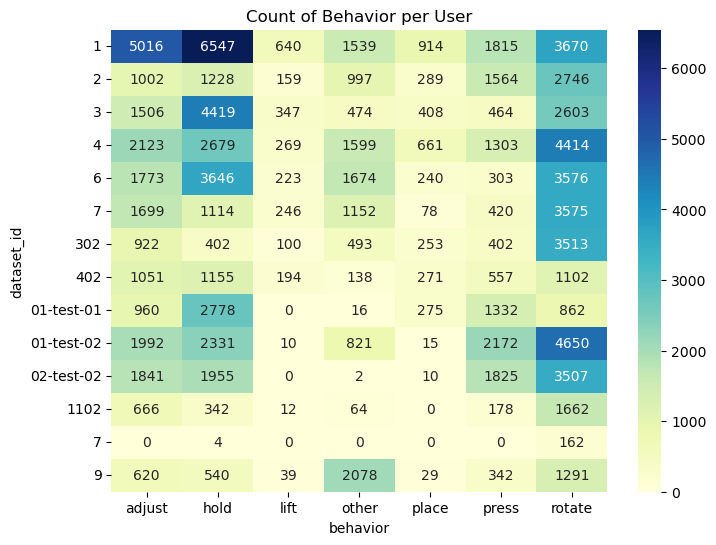

In [247]:
df_counts = df.groupby(['dataset_id', 'behavior']).size().unstack(fill_value=0)

print(df_counts)

plt.figure(figsize=(8, 6))
sns.heatmap(df_counts, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Count of Behavior per User')
plt.xlabel('behavior')
plt.ylabel('dataset_id')
plt.show()

In [248]:
df['dataset_id'] = df['dataset_id'].astype(str)

mapping = {
    '1': 'user1',
    '2': 'user2',
    '3': 'user3',
    '302': 'user3',
    '4': 'user4',
    '402': 'user4',
    '6': 'user5',
    '7': 'user6',
    '9': 'user7',
    '1102': 'user8',
    '01-test-01': 'user0101',
    '01-test-02': 'user0102',
    '02-test-02': 'user0202',
}
df['person_id'] = df['dataset_id'].map(mapping)

/var/folders/rj/522y7b7n1dl67qg86lzg9y_00000gn/T/ipykernel_31910/1386787592.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['person_id'] = df['dataset_id'].map(mapping)


In [249]:
df

,dataset_id,frame,time_sec,hand,hand_detected,x_0,x_1,x_2,x_3,x_4,...,angle_thumb_tip_flex_mean5,angle_thumb_tip_flex_std5,vel_z_8_mean5,vel_z_8_std5,acc_z_8_mean5,acc_z_8_std5,z_8_mean5,z_8_std5,nan_count,person_id
0,1,4838,80.633,Left,1,0.562638,0.523307,0.482645,0.453211,0.428097,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17,user1
1,1,4839,80.650,Left,1,0.568650,0.525218,0.484482,0.452202,0.425792,...,172.957403,0.000000,0.000000,0.000000,0.000000,0.000000,0.005625,0.000000,0,user1
2,1,4840,80.667,Left,1,0.608788,0.557545,0.508360,0.473195,0.442089,...,169.031677,5.551815,-0.003404,0.004814,-0.003404,0.004814,0.002221,0.004814,0,user1
3,1,4841,80.683,Left,1,0.649046,0.593075,0.538306,0.499576,0.468654,...,168.204774,4.178832,0.018771,0.038559,0.021041,0.042476,0.022127,0.034646,0,user1
4,1,4842,80.700,Left,1,0.650377,0.594110,0.538319,0.499342,0.467740,...,168.840738,3.641368,0.014298,0.032730,0.000219,0.054194,0.032299,0.034844,0,user1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117045,9,11162,186.033,Left,1,0.718923,0.734442,0.744641,0.737008,0.725827,...,169.755917,2.779044,0.006903,0.014801,0.003483,0.024549,0.026771,0.018338,0,user7
117046,9,11163,186.050,Left,1,0.721087,0.718295,0.722373,0.717360,0.707138,...,168.581054,2.256331,0.009871,0.014668,0.002968,0.024407,0.036641,0.021633,0,user7
117047,9,11164,186.067,Left,1,0.727917,0.702366,0.698836,0.695893,0.689087,...,167.138111,2.220829,0.012679,0.010921,0.002809,0.024514,0.049321,0.014290,0,user7
117048,9,11165,186.083,Left,1,0.725409,0.714362,0.713132,0.704889,0.694947,...,167.127918,2.209870,0.006244,0.006114,-0.006435,0.012949,0.055565,0.012401,0,user7


In [256]:
behavior_map = {
    'press': 0,
    'adjust': 1,
    'rotate': 2,
    'other': 3,
    'hold': 3,
    'lift': 3,
    'place': 3
}

df['behavior_encoded'] = df['behavior'].map(behavior_map)
df

,dataset_id,frame,time_sec,hand,hand_detected,x_0,x_1,x_2,x_3,x_4,...,angle_thumb_tip_flex_std5,vel_z_8_mean5,vel_z_8_std5,acc_z_8_mean5,acc_z_8_std5,z_8_mean5,z_8_std5,nan_count,person_id,behavior_encoded
1247,1,5929,98.817,Left,1,0.591459,0.625579,0.651917,0.659749,0.667918,...,3.342751,0.002443,0.005938,-0.000139,0.007436,-0.041774,0.007476,0,user1,1
1248,1,5930,98.833,Left,1,0.592415,0.626004,0.651004,0.659993,0.667155,...,2.471606,0.002459,0.005920,0.000016,0.007438,-0.039314,0.003534,0,user1,1
1249,1,5931,98.850,Left,1,0.592034,0.628098,0.654261,0.666322,0.680227,...,2.026284,0.001556,0.004803,-0.000903,0.005603,-0.037758,0.002380,0,user1,1
1250,1,5932,98.867,Left,1,0.591934,0.628256,0.653948,0.666119,0.679369,...,2.013474,-0.002246,0.005902,-0.003802,0.008877,-0.040004,0.004739,0,user1,1
1251,1,5933,98.883,Left,1,0.593303,0.631555,0.656808,0.671773,0.687536,...,1.813541,-0.001701,0.006321,0.000545,0.011538,-0.041705,0.004380,0,user1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117033,9,11074,184.567,Right,1,0.495803,0.578942,0.635216,0.683654,0.710186,...,3.419233,-0.012091,0.044043,0.009544,0.080738,0.128145,0.037917,0,user7,2
117034,9,11075,184.583,Right,1,0.495539,0.579092,0.632622,0.684958,0.711404,...,6.942008,-0.027937,0.048491,-0.015845,0.091973,0.100209,0.045454,0,user7,2
117035,9,11076,184.600,Right,1,0.499559,0.576240,0.626404,0.678726,0.711590,...,7.737436,-0.018416,0.049216,0.009521,0.096470,0.081793,0.048409,0,user7,2
117036,9,11077,184.617,Right,1,0.504995,0.544119,0.578533,0.609012,0.625633,...,6.197763,-0.030170,0.044499,-0.011754,0.093083,0.051624,0.040781,0,user7,2


In [257]:
df_threeclass = df[df['behavior_encoded'].isin([0.0, 1.0, 2.0])].copy()
df_threeclass['behavior_encoded'] = df_threeclass['behavior_encoded'].astype(int)  

df = df_threeclass

In [258]:
df

,dataset_id,frame,time_sec,hand,hand_detected,x_0,x_1,x_2,x_3,x_4,...,angle_thumb_tip_flex_std5,vel_z_8_mean5,vel_z_8_std5,acc_z_8_mean5,acc_z_8_std5,z_8_mean5,z_8_std5,nan_count,person_id,behavior_encoded
1247,1,5929,98.817,Left,1,0.591459,0.625579,0.651917,0.659749,0.667918,...,3.342751,0.002443,0.005938,-0.000139,0.007436,-0.041774,0.007476,0,user1,1
1248,1,5930,98.833,Left,1,0.592415,0.626004,0.651004,0.659993,0.667155,...,2.471606,0.002459,0.005920,0.000016,0.007438,-0.039314,0.003534,0,user1,1
1249,1,5931,98.850,Left,1,0.592034,0.628098,0.654261,0.666322,0.680227,...,2.026284,0.001556,0.004803,-0.000903,0.005603,-0.037758,0.002380,0,user1,1
1250,1,5932,98.867,Left,1,0.591934,0.628256,0.653948,0.666119,0.679369,...,2.013474,-0.002246,0.005902,-0.003802,0.008877,-0.040004,0.004739,0,user1,1
1251,1,5933,98.883,Left,1,0.593303,0.631555,0.656808,0.671773,0.687536,...,1.813541,-0.001701,0.006321,0.000545,0.011538,-0.041705,0.004380,0,user1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117033,9,11074,184.567,Right,1,0.495803,0.578942,0.635216,0.683654,0.710186,...,3.419233,-0.012091,0.044043,0.009544,0.080738,0.128145,0.037917,0,user7,2
117034,9,11075,184.583,Right,1,0.495539,0.579092,0.632622,0.684958,0.711404,...,6.942008,-0.027937,0.048491,-0.015845,0.091973,0.100209,0.045454,0,user7,2
117035,9,11076,184.600,Right,1,0.499559,0.576240,0.626404,0.678726,0.711590,...,7.737436,-0.018416,0.049216,0.009521,0.096470,0.081793,0.048409,0,user7,2
117036,9,11077,184.617,Right,1,0.504995,0.544119,0.578533,0.609012,0.625633,...,6.197763,-0.030170,0.044499,-0.011754,0.093083,0.051624,0.040781,0,user7,2


In [253]:
print(df['person_id'].isna().sum()) 
print(df[df['person_id'].isna()]['dataset_id'].unique())


0
[]


In [259]:
df.to_csv("data_raw_feature.csv", index=False)